In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
#download the data from keras.io/datasets
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

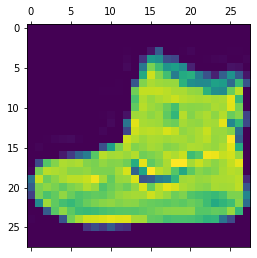

In [6]:
#displaying the first pic from the dataset
plt.matshow(x_train[0])

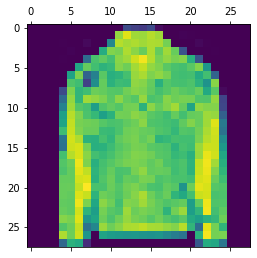

In [11]:
#displaying another pic
plt.matshow(x_train[29])

Populating the interactive namespace from numpy and matplotlib


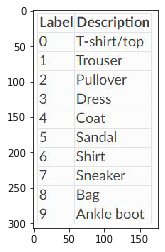

In [20]:
%pylab inline
import matplotlib.image as mpimg
img1=mpimg.imread('fashion-mnist-label.jpg')
imgplot = plt.imshow(img1)
plt.show()

In [12]:
y_train[0] #9 is Ankle boot

9

In [13]:
y_train[29] #4 is Coat

4

In [15]:
#normalizing the value of the pixels to 0-1 instead of 0-255
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [26]:
#create a model
model = Sequential()

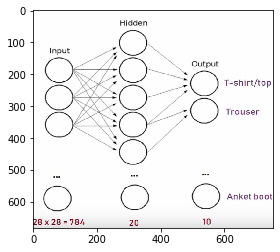

In [24]:
img2=mpimg.imread('simple-layers.jpg')
imgplot = plt.imshow(img2)
plt.show()

In [27]:
model.add(Flatten(input_shape=[28,28])) #input layers
model.add(Dense(20, activation='relu')) #hidden layers
model.add(Dense(10, activation='softmax')) #output layers

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


-784 input layers (28 x 28) -> flattened
-20 hidden layers -> can be adjusted by trial and error to look for the optimal result
-10 output layers which is the label for y_train containing 0-9 classes (Ankle boot, Coat, T-Shirt, etc)

In [29]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
#training the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3006 - acc: 0.8908
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2989 - acc: 0.8918
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2967 - acc: 0.8933
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2931 - acc: 0.8942
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2916 - acc: 0.8942


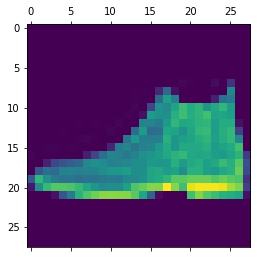

In [33]:
#do predictions
plt.matshow(x_test[0])

In [34]:
x_test.shape

(10000, 28, 28)

In [35]:
yp = model.predict(x_test)

In [36]:
yp[0] #predicting the [0] pic

array([1.84430016e-09, 2.59996972e-11, 6.32322008e-06, 7.84871099e-06,
       7.53115170e-09, 1.03744175e-02, 7.57817276e-08, 5.54063469e-02,
       3.97730211e-04, 9.33807254e-01], dtype=float32)

the array contains 0-9 classes. as can be seen, the 9th class has the highest value which means the system predicted that the [0] pic is in the 9th class

In [37]:
np.argmax(yp[0])

9

In [38]:
yp[5]

array([3.5768870e-04, 9.9957174e-01, 1.2692721e-05, 1.2272127e-05,
       2.0754569e-06, 1.4427271e-13, 4.3501623e-05, 5.9434441e-18,
       9.2981985e-12, 6.1826043e-12], dtype=float32)

In [39]:
np.argmax(yp[5])

1

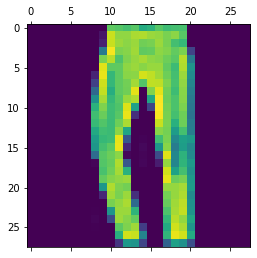

In [40]:
plt.matshow(x_test[5])

In [41]:
#evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 23us/step


[0.37684796171188356, 0.8714]

[loss, accuracy]